# Xocs inelàstics

1. Dos cotxes amb massa m= 1000 kg circulen a 60 km/h i xoquen frontalment, quedant aturats. Calculeu   
 a) L'energia alliberada en forma de calor per a cada cotxe.   
 b) Els temps de frenada si els frens a cada cotxe exerceixen una força constant F = 4 kN   
 c) L'espai recorregut en aquesta frenada   
 d) Repetiu els apartats anteriors si la velocitat fos el doble (120 km/h) 

## Solució

Veiem que podem fer amb el que sabem de teoria. 

A l'apartat *(a)* es tracta d'un xoc inelàstic amb velocitat final = 0 m/s on tota l'energia cinètica es dissipa en forma de calor:

$Q = \Delta E = Ec(v=v0)$   

$Ec = \frac{1}{2} \cdot m \cdot v^{2}$

A l'apartat *(b)* tenim un M.U.A. amb acceleració negativa que acaba al repòs:

$F = m \cdot a \Rightarrow  a = \frac{F}{m}$

$v = v_{0} + a \cdot t$

$\Delta r = v_{0} \cdot t + \frac{1}{2}\cdot a \cdot t^{2}$

Per tant, sembla que introduïnt les dades a les fòrmules tenim resolt el nostre problema

Anem a la pràctica ...

### Treballant amb unitats a python. La llibreria *pint*

La llibreria *pint* ens permet treballar amb unitats, fer conversions i donar més rigor als càlculs   
Teniu un bon tutorial a https://pint.readthedocs.io/en/0.13/tutorial.html

In [4]:
from pint import UnitRegistry
ureg = UnitRegistry()
m = 1000 * ureg.kg
v0 = 60 * ureg.km / ureg.hour

El primer pas seria tenir les dades en Sistema Internacional. Fixeu-vos que la llibreria *pint* s'encarrega d'això.   
Si bé v0 el tenim en $\frac{km}{h}$

In [5]:
v0

60.0 <Unit('kilometer / hour')>

Sempre podem convertir una dada al Sistema Internacional amb `.ito_base_units()`

In [6]:
v0.ito_base_units()
v0

16.666666666666668 <Unit('meter / second')>

Podem millorar l'expressió gestionan el format de sortida:

In [7]:
'Velocitat inicial en S.I: {:P~}'.format(v0)

'Velocitat inicial en S.I: 16.666666666666668 m/s'

Si haguessim fet nosaltres mateixos la conversió obtindriam el mateix valor:

In [8]:
v0 = 60 * ureg.km / ureg.hour
v0 = v0 * 1000 * ureg.m / ureg.km * ureg.hour / (3600 * ureg.s)
v0

16.666666666666668 <Unit('meter / second')>

Encara que de vegades haurem de forçar la simplificació d'uniotats amb `ito_reduced_units()` (veure https://pint.readthedocs.io/en/0.13/tutorial.html#converting-quantities)

In [9]:
density = 1.4 * ureg.gram / ureg.cm**3
volume = 10*ureg.cc
mass = density*volume
print(mass)

14.0 cubic_centimeter * gram / centimeter ** 3


In [10]:
mass.ito_reduced_units()
mass

14.0 <Unit('gram')>

Ara que sabem com treballar amb unitats a python ens podrem dedicar a resoldre el nostre problema

### a) L'energia alliberada en forma de calor per a cada cotxe.  

Ara ja podem calcular la energia cinética de cada cotxe $Ec=\frac{1}{2}\cdot m\cdot v^{2}$

In [11]:
Ec=1/2*m*v0**2
Ec

138888.8888888889 <Unit('kilogram * meter ** 2 / second ** 2')>

Naturalment l'energia es mesura en J. Podem fer el canvi amb `.ito(ureg.J)`

In [12]:
Ec.ito(ureg.J)
Ec

138888.8888888889 <Unit('joule')>

I tenir-la amb un múltiple adient. *pint* ho pot fer amb `.to_compact`

In [13]:
print (Ec.to_compact())

138.8888888888889 kilojoule


Que justament és alliberada en forma de calor per a cada cotxe   

L'expresió correcta d'aquest resultat seria **Q = 138,8 kJ**

### b) Els temps de frenada si els frens a cada cotxe exerceixen una força constant F = 4 kN   

Com la força de frenada s'oposa a la velocitat tindrà signe negatiu:

In [14]:
F =  -4 * ureg.kN
a = F / m
a

-0.004 <Unit('kilonewton / kilogram')>

Ho arreglem amb `.ito_base_units()`

In [15]:
a.ito_base_units()
a

-4.0 <Unit('meter / second ** 2')>

In [16]:
t = (0 * ureg.m / ureg.s - v0) / a
t

4.166666666666667 <Unit('second')>

Per tant tindrem un tems de frenada **t = 4,167 s** 

### c) L'espai recorregut en aquesta frenada   

In [17]:
r = v0 * t + 1 / 2 * a *t**2
r

34.72222222222223 <Unit('meter')>

Es a dir, l'espai recorregut en aquesta frenada derà de **r = 34,72 m**

### d) Repetiu els apartats anteriors si la velocitat fos el doble (120 km/h) 

Podem repetir les fòrmules, canviant el valor inicial de v0:

In [18]:
v0 = 120 * ureg.km / ureg.hour
v0.ito_base_units()
v0

33.333333333333336 <Unit('meter / second')>

In [19]:
Ec=1/2*m*v0**2
Ec.ito(ureg.J)
print (Ec.to_compact())

555.5555555555557 kilojoule


**a) Q' = 555,6 kJ**

In [20]:
t = (0 * ureg.m / ureg.s - v0) / a
t

8.333333333333334 <Unit('second')>

**b) t' = 8,333 s**

In [21]:
r = v0 * t + 1 / 2 * a *t**2
r

138.8888888888889 <Unit('meter')>

**c) r = 138,9 m**

## Conclusions

Comparem resultats:

<table>
<tbody>
<tr><td>v0</td><td>Q</td><td>t</td><td>r</td></tr>
<tr><td>60 km/h</td><td>138,8 kJ</td><td>4,167 s</td><td>34,72 m</td></tr>
<tr><td>120 km/h</td><td>555,8 kJ</td><td>8,333 s</td><td>138,9 m</td></tr>
</tbody>
</table>


Si bé el temps s'ha duplicat com la velocitat inicial, la calor dissipada i la distància recorreguda s'han multiplicat per 4. Això és degut a la depèndencia quadràtica de **Q** i **r** amb la velocitat inicial. El temps **t**, en canvi, té una dependència linial amb **v0**

Veiem gràficament aquestes dependències:

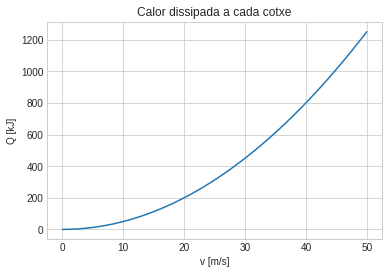

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x, 1 / 2 * x * x);
plt.title("Calor dissipada a cada cotxe")
plt.xlabel("v [m/s]")
plt.ylabel("Q [kJ]");

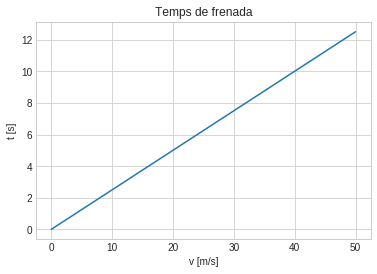

In [23]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x, x / 4);
plt.title("Temps de frenada")
plt.xlabel("v [m/s]")
plt.ylabel("t [s]");

Com imagineu, la gràfica de l'espai recorregut a la frenada és més difícil de fer, ja que depén de **v0** i de **t**, que també depèn de **v0**. Però no per això aquesta dependència **quadràtica** és menys important, com sabreu tots els que estudieu per treure's el carnet de conduir!

$v = v_{0} + a \cdot t = 0 \Rightarrow t = - \frac{v_{0}}{a} $

$\Delta r = v_{0} \cdot t + \frac{1}{2}\cdot a \cdot t^{2}$

$\Delta r = v_{0} \cdot (- \frac{v_{0}}{a}) + \frac{1}{2}\cdot a \cdot {(- \frac{v_{0}}{a})^{2}}$

$\Delta r = - \frac{(v_{0})^{2}}{a} + \frac{1}{2}\cdot \frac{(v_{0})^{2}}{a} = \frac{1}{2} \frac{(v_{0})^{2}}{a}$

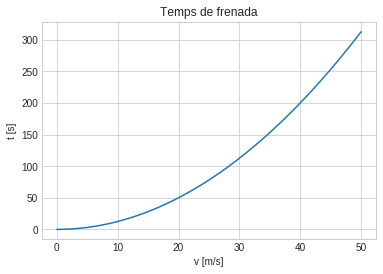

In [24]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x, 1 / 2 * x * x / 4);
plt.title("Temps de frenada")
plt.xlabel("v [m/s]")
plt.ylabel("t [s]");

Representem la mateixa corba posant la velocitat en $\frac{km}{h}$

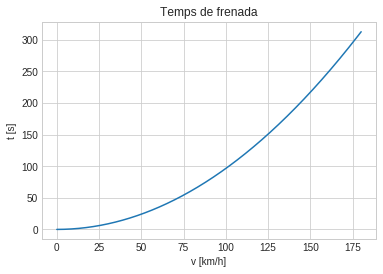

In [25]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x * 3.6, 1 / 2 * x * x / 4);
plt.title("Temps de frenada")
plt.xlabel("v [km/h]")
plt.ylabel("t [s]");

Com veieu per a una acceleració de - 4 $\frac{m}{s}$ es compleix la regla de dividir per 10 la velocitat en $\frac{km}{h}$ per obtenir la distància de seguretat en $m$. Aquesta acceleració correspon a **0,4g** , valor raonable en un cas real.